In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("penguins").dropna()

In [3]:
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
y = df['body_mass_g']

# ENTRENAMIENTO DE MODELO DE REGRESIÓN CON ARBOLES DE DECISIÓN

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_regresor = RandomForestRegressor(random_state=42)
tree_regresor.fit(X_train,y_train)

y_pred = tree_regresor.predict(X_test)

# evaluación del modelo
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f' MAE : {mae} | R2 : {r2}')

 MAE : 262.9850746268657 | R2 : 0.8304367822788581


# EVALUAMOS CUAL ES EL MEJOR PARAMETRO DE MAX_DEPTH QUE NO CAIGA EN SOBREAJUSTE

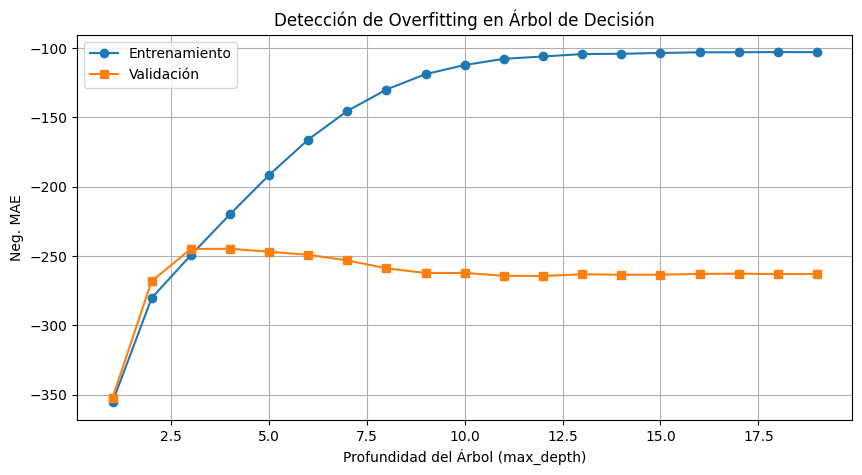

In [5]:
train_scores = []
val_scores = []
max_depths = range(1,20)

for depth in max_depths:
  model = RandomForestRegressor(max_depth=depth,random_state=42)
  model.fit(X_train,y_train)

  train_mae = -mean_absolute_error(y_train,model.predict(X_train))
  val_mae = -mean_absolute_error(y_test,model.predict(X_test))

  train_scores.append(train_mae)
  val_scores.append(val_mae)

# Graficamos las curvas de MAE
plt.figure(figsize=(10, 5))
plt.plot(max_depths, train_scores, label="Entrenamiento", marker='o')
plt.plot(max_depths, val_scores, label="Validación", marker='s')
plt.xlabel("Profundidad del Árbol (max_depth)")
plt.ylabel("Neg. MAE")
plt.title("Detección de Overfitting en Árbol de Decisión")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.3 MB/s eta 0:00:00


In [7]:
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

# Definir los rangos de hiperparámetros
param_space = {
    'n_estimators': Integer(50, 300),
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Categorical(['sqrt', 'log2'])
}

# Instancia del modelo
rf = RandomForestRegressor(random_state=42)

# Optimización bayesiana
bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_space,
                             n_iter=20, cv=5, scoring='r2', n_jobs=-1, verbose=2, random_state=42)

# Entrenar con los datos
bayes_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print("Mejores parámetros:", bayes_search.best_params_)
print("Mejor puntuación:", bayes_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

<ipython-input-10-5ba885b5f041>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_df.feature,y=feature_importances_df.importance,palette = 'bright', saturation = 2.0, edgecolor ='black', linewidth = 2)


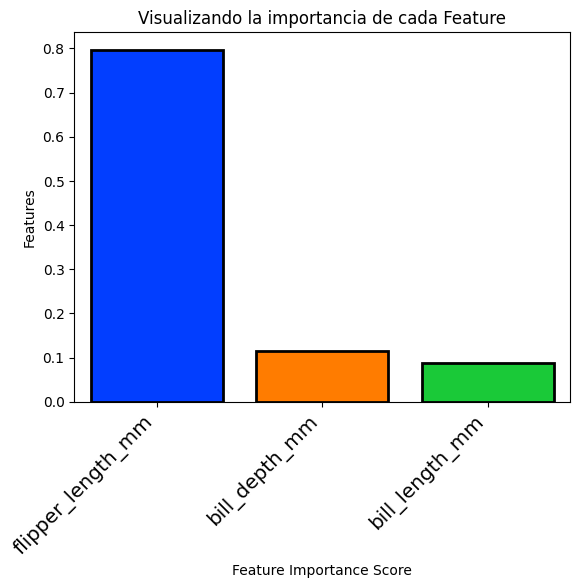

In [10]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
feature_importances_df = pd.DataFrame({"feature": features,"importance": model.feature_importances_}).sort_values("importance",ascending=False)
feature_importances_df
sns.barplot(x=feature_importances_df.feature,y=feature_importances_df.importance,palette = 'bright', saturation = 2.0, edgecolor ='black', linewidth = 2)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizando la importancia de cada Feature')
plt.xticks(rotation=45,horizontalalignment ="right",fontweight="light",fontsize="x-large")
plt.show()